In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
import warnings
warnings.simplefilter('ignore')


In [2]:
fao_data = pd.read_csv("latest_2504.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Insecticides – Pyrethroids,Mineral Oils,Plant Growth Regulators,Rodenticides – Other,Herbicides – Bipiridils,Herbicides – Sulfonyl ureas,Rodenticides – Anti-coagulants,yield_t-1,yield_t-2,yield_t-3
1993-01-01,1612215,415000,645000,Barley,0.000001,142.0,188.0,2413.0,2193.0,1768.0,...,56.0,682.0,2293.0,48.0,161.0,23.0,1.00,0.064201,0.715801,0.355001
1994-01-01,1787436,451000,668000,Barley,0.267301,176.0,614.0,2427.0,2078.0,1460.0,...,44.0,667.0,1672.0,19.0,51.0,24.0,1.00,0.000001,0.064201,0.715801
1995-01-01,1770000,401946,649000,Barley,0.638301,184.0,1043.0,2966.0,2514.0,1629.0,...,47.0,401.0,2435.0,18.0,141.0,41.0,1.00,0.267301,0.000001,0.064201
1996-01-01,1758008,415136,645781,Barley,0.466501,173.0,1288.0,3452.0,2631.0,1767.0,...,42.0,782.0,2642.0,18.0,84.0,53.0,0.00,0.638301,0.267301,0.000001
1997-01-01,1788388,409536,658895,Barley,0.891501,188.0,795.0,2989.0,2158.0,2111.0,...,35.0,138.0,3040.0,42.0,104.0,59.0,1.00,0.466501,0.638301,0.267301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,1658837,231079,430080,Grapes,4.840801,67.0,458.0,1560.0,2404.0,5304.0,...,105.0,138.0,3871.0,8.0,132.0,122.0,0.04,4.151401,5.573001,3.728401
2017-01-01,1496649,208527,391640,Grapes,2.456701,112.0,357.0,1693.0,3511.0,5418.0,...,126.0,113.0,3381.0,3.0,144.0,113.0,0.04,4.840801,4.151401,5.573001
2018-01-01,1342284,201159,409547,Grapes,8.485201,76.0,292.0,1644.0,3313.0,4503.0,...,133.0,119.0,2138.0,5.0,165.0,99.0,0.10,2.456701,4.840801,4.151401
2019-01-01,1372084,247766,419542,Grapes,1.772001,47.0,293.0,1513.0,2711.0,3953.0,...,113.0,120.0,2089.0,10.0,84.0,130.0,0.41,8.485201,2.456701,4.840801


In [3]:
crops1 = ['Wheat', 'Barley', 'Maize', 'Sugar beet', 'Potatoes', 'Rye', 'Rape', 'Apples', 'Grapes', 'Cabbages']
mask = fao_data["Item"].str.contains("|".join(crops1))
df = fao_data[mask]
#df.reset_index(drop=True, inplace=True)
df.columns
df

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Insecticides – Pyrethroids,Mineral Oils,Plant Growth Regulators,Rodenticides – Other,Herbicides – Bipiridils,Herbicides – Sulfonyl ureas,Rodenticides – Anti-coagulants,yield_t-1,yield_t-2,yield_t-3
1993-01-01,1612215,415000,645000,Barley,0.000001,142.0,188.0,2413.0,2193.0,1768.0,...,56.0,682.0,2293.0,48.0,161.0,23.0,1.00,0.064201,0.715801,0.355001
1994-01-01,1787436,451000,668000,Barley,0.267301,176.0,614.0,2427.0,2078.0,1460.0,...,44.0,667.0,1672.0,19.0,51.0,24.0,1.00,0.000001,0.064201,0.715801
1995-01-01,1770000,401946,649000,Barley,0.638301,184.0,1043.0,2966.0,2514.0,1629.0,...,47.0,401.0,2435.0,18.0,141.0,41.0,1.00,0.267301,0.000001,0.064201
1996-01-01,1758008,415136,645781,Barley,0.466501,173.0,1288.0,3452.0,2631.0,1767.0,...,42.0,782.0,2642.0,18.0,84.0,53.0,0.00,0.638301,0.267301,0.000001
1997-01-01,1788388,409536,658895,Barley,0.891501,188.0,795.0,2989.0,2158.0,2111.0,...,35.0,138.0,3040.0,42.0,104.0,59.0,1.00,0.466501,0.638301,0.267301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,1658837,231079,430080,Grapes,4.840801,67.0,458.0,1560.0,2404.0,5304.0,...,105.0,138.0,3871.0,8.0,132.0,122.0,0.04,4.151401,5.573001,3.728401
2017-01-01,1496649,208527,391640,Grapes,2.456701,112.0,357.0,1693.0,3511.0,5418.0,...,126.0,113.0,3381.0,3.0,144.0,113.0,0.04,4.840801,4.151401,5.573001
2018-01-01,1342284,201159,409547,Grapes,8.485201,76.0,292.0,1644.0,3313.0,4503.0,...,133.0,119.0,2138.0,5.0,165.0,99.0,0.10,2.456701,4.840801,4.151401
2019-01-01,1372084,247766,419542,Grapes,1.772001,47.0,293.0,1513.0,2711.0,3953.0,...,113.0,120.0,2089.0,10.0,84.0,130.0,0.41,8.485201,2.456701,4.840801


In [4]:
crop_names = df['Item'].unique()
crop_names

array(['Barley', 'Cabbages', 'Maize (corn)', 'Potatoes',
       'Rape or colza seed', 'Rye', 'Sugar beet', 'Wheat', 'Apples',
       'Grapes'], dtype=object)

In [5]:
lime_df = pd.DataFrame()
column_names = ['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other', 'Fung & Bact – Triazoles, diazoles',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Other',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Urea derivates',
       'Insecticides – Botanical products and biologicals',
       'Insecticides – Carbamates', 'Insecticides – Organo-phosphates',
       'Insecticides – Other', 'Insecticides – Pyrethroids', 'Mineral Oils',
       'Plant Growth Regulators', 'Rodenticides – Other',
       'Herbicides – Bipiridils', 'Herbicides – Sulfonyl ureas',
       'Rodenticides – Anti-coagulants', 'yield_t-1', 'yield_t-2',
       'yield_t-3']

Intercept 6.062311168550483
Prediction_local [5.97347927]
Right: 6.031501192780804


,Features_Barley,Coeffcients (SVM)_Barley
0,1946800.00 < harvest_area (ha) <= 2146335.50,-0.095806
1,1720000.00 < Nutrient nitrogen N (total) - ton...,-0.028583
2,287762.00 < Nutrient phosphate P2O5 (total) - ...,0.022255
3,459855.00 < Nutrient potash K2O (total) - tonn...,-0.016887
4,0.04 < Rodenticides – Anti-coagulants <= 0.10,0.013636
5,1997.00 < Year <= 2006.00,0.012344
6,Insecticides – Organo-phosphates > 441.50,0.011040
7,71.50 < Fung & Bact – Benzimidazoles <= 134.88,0.009658
8,1552.39 < Herbicides – Triazines <= 2153.15,-0.008828
9,5890.23 < Herbicides – Other <= 6680.33,-0.007661


Intercept 49.952713815238475
Prediction_local [51.34845419]
Right: 51.025716978437146


,Features_Cabbages,Coeffcients (SVM)_Cabbages
0,Nutrient nitrogen N (total) - tonnes <= 162631...,1.111089
1,420292.00 < Nutrient potash K2O (total) - tonn...,0.269802
2,260851.50 < Nutrient phosphate P2O5 (total) - ...,0.128270
3,2004.00 < Year <= 2011.50,-0.041663
4,"1198.24 < Fung & Bact – Triazoles, diazoles <=...",0.038240
5,1902.01 < Herbicides – Urea derivates <= 3356.50,-0.034807
6,3014.48 < Fung & Bact – Other <= 3912.31,-0.034430
7,Herbicides – Bipiridils <= 96.47,-0.034349
8,14254.00 < harvest_area (ha) <= 15028.00,-0.032658
9,Insecticides – Other <= 460.85,0.026246


Intercept 8.553899504672733
Prediction_local [9.58498262]
Right: 9.342914234918021


,Features_Maize (corn),Coeffcients (SVM)_Maize (corn)
0,Nutrient potash K2O (total) - tonnes <= 431911.50,0.552698
1,Nutrient phosphate P2O5 (total) - tonnes <= 25...,0.240075
2,Nutrient nitrogen N (total) - tonnes <= 162631...,0.208294
3,Fung & Bact – Inorganics > 2688.57,0.028680
4,0.10 < Rodenticides – Anti-coagulants <= 0.41,-0.021143
5,Insecticides – Botanical products and biologic...,0.019859
6,Herbicides – Phenoxy hormone products <= 1068.95,0.019381
7,Herbicides – Carbamates <= 555.50,-0.016562
8,Rodenticides – Other <= 17.00,-0.015397
9,Insecticides – Pyrethroids > 89.74,0.015198


Intercept 39.87315180820987
Prediction_local [39.62294118]
Right: 39.779482835735855


,Features_Potatoes,Coeffcients (SVM)_Potatoes
0,1758008.00 < Nutrient nitrogen N (total) - ton...,-0.290619
1,459855.00 < Nutrient potash K2O (total) - tonn...,0.040572
2,78.10 < Rodenticides – Other <= 114.66,-0.040433
3,1354.26 < Herbicides – Phenoxy hormone product...,0.040187
4,Insecticides – Other > 709.88,0.034988
5,2351.21 < Fung & Bact – Inorganics <= 2671.00,-0.031172
6,2197.04 < Fung & Bact – Other <= 3180.00,-0.030635
7,1365.73 < Herbicides – Urea derivates <= 1902.01,0.030300
8,6523.40 < Herbicides – Other <= 7051.23,-0.029719
9,58.33 < Insecticides – Botanical products and ...,0.026321


Intercept 3.3402644942396043
Prediction_local [3.72892144]
Right: 3.776139888837413


,Features_Rape or colza seed,Coeffcients (SVM)_Rape or colza seed
0,harvest_area (ha) > 1327150.00,0.242817
1,1710616.00 < Nutrient nitrogen N (total) - ton...,0.047973
2,420292.00 < Nutrient potash K2O (total) - tonn...,0.045367
3,247423.00 < Nutrient phosphate P2O5 (total) - ...,0.021280
4,6680.33 < Herbicides – Other <= 7229.05,0.011067
5,"1193.22 < Fung & Bact – Triazoles, diazoles <=...",0.008962
6,Fung & Bact – Inorganics <= 2111.24,0.007053
7,91.09 < Herbicides – Bipiridils <= 106.56,-0.006941
8,Rodenticides – Other > 110.97,0.006336
9,677.66 < Herbicides – Dinitroanilines <= 837.00,0.004745


Intercept 5.134568028307688
Prediction_local [5.28821319]
Right: 5.315166401083288


,Features_Rye,Coeffcients (SVM)_Rye
0,423576.50 < Nutrient potash K2O (total) - tonn...,0.091828
1,1720000.00 < Nutrient nitrogen N (total) - ton...,0.057727
2,255845.00 < Nutrient phosphate P2O5 (total) - ...,0.047769
3,615309.00 < harvest_area (ha) <= 710502.00,-0.023897
4,707.00 < Herbicides – Carbamates <= 930.50,-0.012398
5,598.00 < Insecticides – Other <= 726.18,-0.009427
6,0.04 < Rodenticides – Anti-coagulants <= 0.10,0.007817
7,"Fung & Bact – Triazoles, diazoles <= 1203.92",0.007368
8,Herbicides – Amides > 3318.62,-0.006610
9,92.08 < Herbicides – Bipiridils <= 110.74,-0.006532


Intercept 59.033177533079126
Prediction_local [62.67071445]
Right: 61.739496901182704


,Features_Sugar beet,Coeffcients (SVM)_Sugar beet
0,Nutrient nitrogen N (total) - tonnes <= 162631...,2.053355
1,Nutrient potash K2O (total) - tonnes <= 423576.50,0.876233
2,Nutrient phosphate P2O5 (total) - tonnes <= 26...,0.422928
3,harvest_area (ha) <= 392050.00,0.281209
4,Insecticides – Carbamates > 183.52,0.062229
5,890.15 < Herbicides – Dinitroanilines <= 1005.04,-0.055152
6,Rodenticides – Anti-coagulants > 0.35,-0.050027
7,2325.59 < Herbicides – Amides <= 3318.62,0.042846
8,2005.00 < Year <= 2012.50,0.032019
9,134.38 < Fung & Bact – Benzimidazoles <= 196.63,-0.028102


Intercept 7.482804049281421
Prediction_local [6.96112051]
Right: 6.816065435176657


,Features_Wheat,Coeffcients (SVM)_Wheat
0,harvest_area (ha) <= 2818977.50,-0.461709
1,1720000.00 < Nutrient nitrogen N (total) - ton...,0.032875
2,Nutrient potash K2O (total) - tonnes > 586342.50,-0.032811
3,Nutrient phosphate P2O5 (total) - tonnes > 376...,-0.022081
4,Insecticides – Other <= 460.85,-0.014074
5,"Fung & Bact – Diazines, morpholines > 795.55",-0.010837
6,Insecticides – Pyrethroids > 99.05,0.010499
7,Insecticides – Botanical products and biologic...,-0.009376
8,Fung & Bact – Benzimidazoles > 186.00,-0.007557
9,754.80 < Herbicides – Triazines <= 1572.02,-0.006611


Intercept 28.492009125812245
Prediction_local [27.97924914]
Right: 27.77608534503712


,Features_Apples,Coeffcients (SVM)_Apples
0,Nutrient potash K2O (total) - tonnes > 535789.75,-0.436501
1,Nutrient phosphate P2O5 (total) - tonnes > 342...,-0.228758
2,1602894.75 < Nutrient nitrogen N (total) - ton...,0.152405
3,Fung & Bact – Benzimidazoles > 174.45,-0.038914
4,Rodenticides – Anti-coagulants > 0.38,0.022884
5,Insecticides – Other <= 479.78,0.020723
6,Insecticides – Carbamates > 186.51,-0.018872
7,Herbicides – Carbamates > 891.85,-0.018470
8,Mineral Oils > 150.78,0.018036
9,2903.52 < Plant Growth Regulators <= 3232.14,0.014707


Intercept 13.037660837997114
Prediction_local [12.55793275]
Right: 12.577857524906864


,Features_Grapes,Coeffcients (SVM)_Grapes
0,Nutrient potash K2O (total) - tonnes <= 428095.50,-0.347912
1,247423.00 < Nutrient phosphate P2O5 (total) - ...,-0.108130
2,1606001.50 < Nutrient nitrogen N (total) - ton...,-0.089037
3,Herbicides – Other > 7051.23,0.031921
4,"Fung & Bact – Triazoles, diazoles > 1786.50",-0.021985
5,Insecticides – Carbamates > 173.50,0.018874
6,Plant Growth Regulators > 3156.01,0.018593
7,Rodenticides – Other > 114.66,-0.018358
8,Fung & Bact – Dithiocarbamates <= 1624.78,0.018204
9,Herbicides – Sulfonyl ureas > 117.50,0.018102


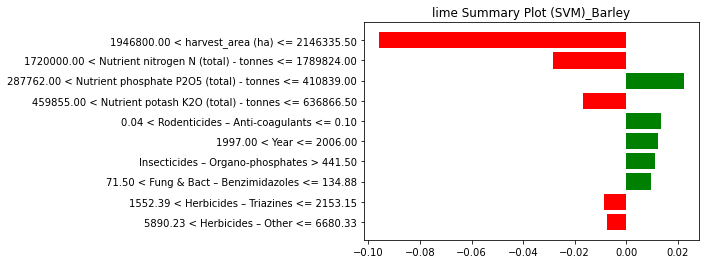

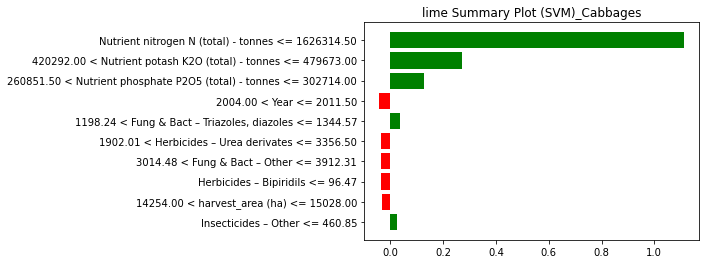

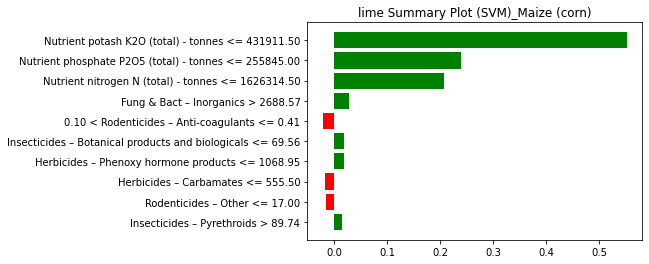

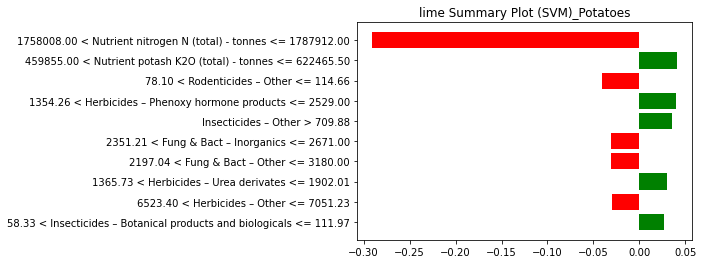

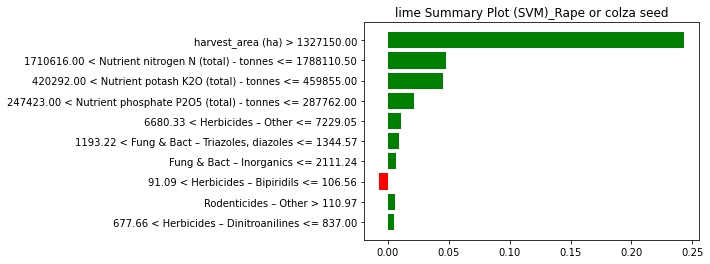

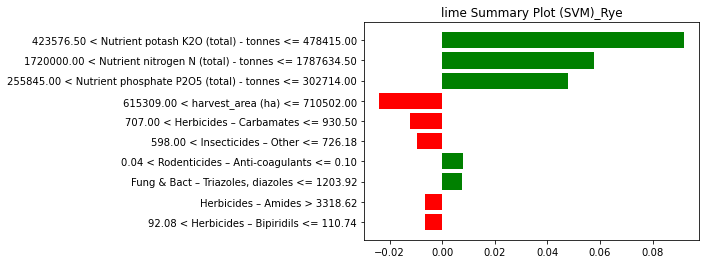

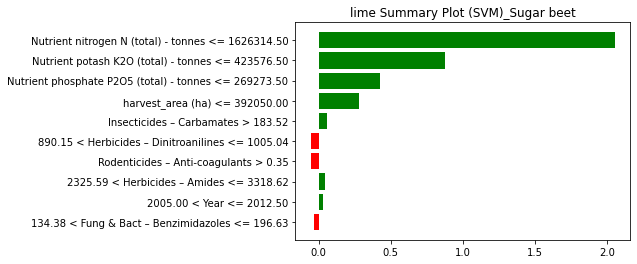

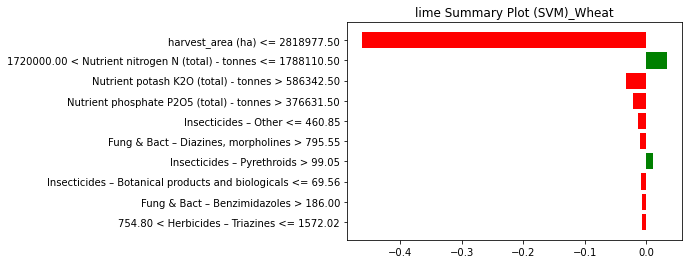

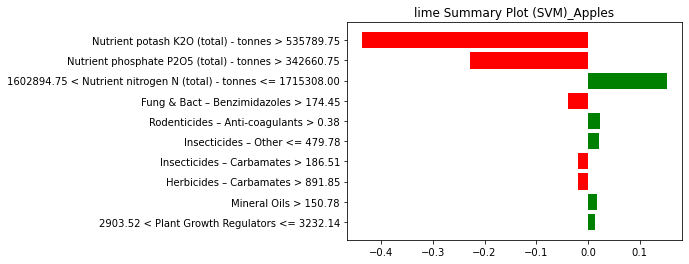

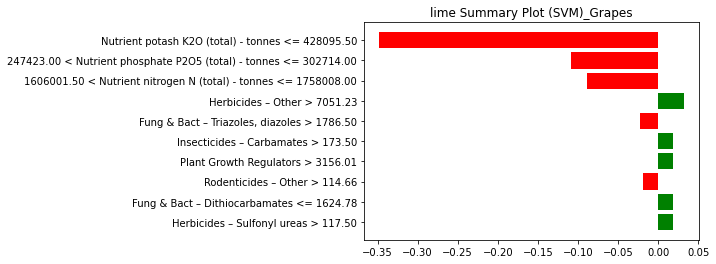

In [6]:
mmsc_X = MinMaxScaler()
for crop in crop_names:
    crop_df = df[df['Item'] == crop]
    x1 = mmsc_X.fit_transform(crop_df[['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other', 'Fung & Bact – Triazoles, diazoles',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Other',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Urea derivates',
       'Insecticides – Botanical products and biologicals',
       'Insecticides – Carbamates', 'Insecticides – Organo-phosphates',
       'Insecticides – Other', 'Insecticides – Pyrethroids', 'Mineral Oils',
       'Plant Growth Regulators', 'Rodenticides – Other',
       'Herbicides – Bipiridils', 'Herbicides – Sulfonyl ureas',
       'Rodenticides – Anti-coagulants', 'yield_t-1', 'yield_t-2',
       'yield_t-3']])
    x = pd.DataFrame(columns=column_names, data=x1)
    y = crop_df[['Yield(tonnes/ha)']]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = SVR(kernel='poly')
    regressor.fit(x_train, y_train)

    #prediction of new value
    y_pred = regressor.predict(x_test)
    crop_c = crop

    #lime implementation


    
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_test.columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(x_test.iloc[0], 
     regressor.predict, num_features=10)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (SVM)_" + crop_c)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + crop_c, 'Coeffcients (SVM)_' + crop_c]))
    
   
